In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
# 사전학습 모델 로드

try:
    cnn = tf.keras.models.load_model('./cifar10_accuracy_80.h5')
    print('pre-trained model is loaded !!!')
    
except Exception as err:
    print(str(err))

pre-trained model is loaded !!!


In [ ]:
import glob

test_image_data_list = glob.glob('my_test_image/*/*')

print(test_image_data_list)

['my_test_image/cat/cat.9.jpg', 'my_test_image/dog/dog3.png', 'my_test_image/dog/dog4.jpg', 'my_test_image/dog/dog.6331.jpg', 'my_test_image/airplane/fighter.1.jpg', 'my_test_image/airplane/airplane.1.jpg']


In [ ]:
# 정답 추출

label_list = []

for index in range(len(test_image_data_list)):

    label_list.append(test_image_data_list[index].split('/')[1].strip())

print(label_list)

['cat', 'dog', 'dog', 'dog', 'airplane', 'airplane']


In [ ]:
import cv2

# 테스트 이미지 읽기

src_img_list = []
dst_img_list = []

for index in range(len(test_image_data_list)):

    src_img = cv2.imread(test_image_data_list[index], cv2.IMREAD_COLOR)  # 이미지 읽기
    dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)  # color 채널순서 변경
    dst_img = cv2.resize(dst_img, dsize=(32,32))  # 가이즈 변경
    dst_img = dst_img / 255.0    # 정규화

    print(src_img.shape, dst_img.shape)

    src_img_list.append(src_img)
    dst_img_list.append(dst_img)

(425, 320, 3) (32, 32, 3)
(510, 525, 3) (32, 32, 3)
(225, 242, 3) (32, 32, 3)
(240, 319, 3) (32, 32, 3)
(173, 292, 3) (32, 32, 3)
(576, 1024, 3) (32, 32, 3)


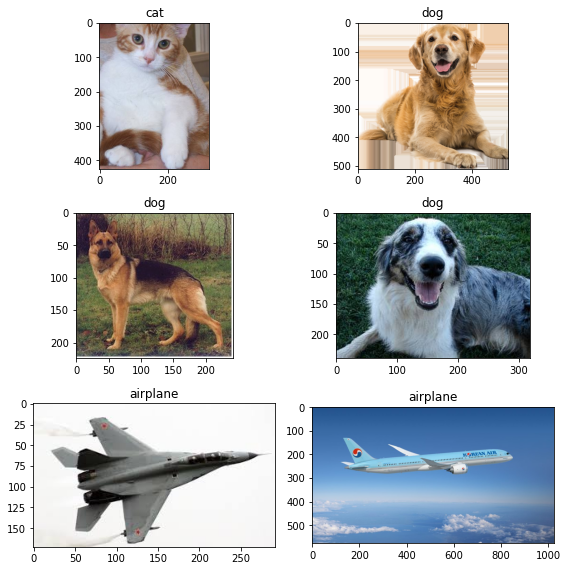

In [ ]:
plt.figure(figsize=(8,8))

for index in range(len(dst_img_list)):

    plt.subplot(3, 2,index+1)
    plt.title(label_list[index])
    temp = cv2.cvtColor(src_img_list[index], cv2.COLOR_BGR2RGB)
    plt.imshow(temp)

plt.tight_layout()
plt.show()

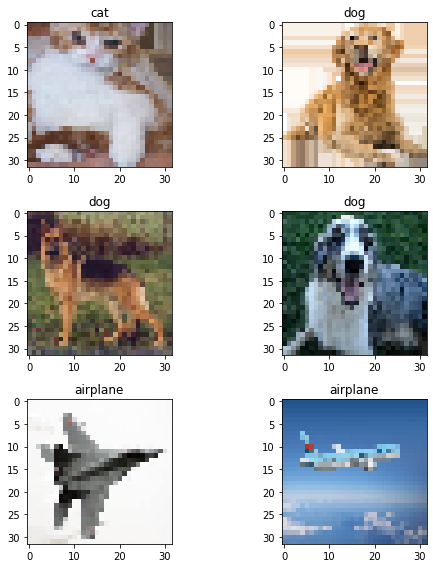

In [ ]:
# matplotlib 이용해서 이미지 출력

plt.figure(figsize=(8,8))

for index in range(len(dst_img_list)):

    plt.subplot(3,2,index+1)
    plt.title(label_list[index])
    plt.imshow(dst_img_list[index])

plt.tight_layout()
plt.show()

In [ ]:
# 예측

dst_img_array = np.array(dst_img_list)

print(dst_img_array.shape)

(6, 32, 32, 3)


In [ ]:
# 이미지 예측을 위한 class name 정의

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
pred = cnn.predict(dst_img_array)

print(pred.shape)

(6, 10)


In [ ]:
for index in range(len(pred)):

    class_index = np.argmax(pred[index])
    print('prediction => ',class_names[class_index], pred[index].max(), ', label = ', label_list[index])

prediction =>  cat 0.38814533 , label =  cat
prediction =>  dog 0.49567944 , label =  dog
prediction =>  deer 0.45023304 , label =  dog
prediction =>  dog 0.87979263 , label =  dog
prediction =>  airplane 0.99812275 , label =  airplane
prediction =>  airplane 0.9995177 , label =  airplane


In [ ]:
# 상위 3개 예측 값
top3 = 3

for index in range(len(pred)):

    sorted_index = pred[index].argsort()  # 오름차순으로 인덱스 정렬
    sorted_index = sorted_index[::-1]     # 내림차순으로 인덱스 정렬

    print('=====================================')
    print(sorted_index, ', label = ', label_list[index])
    
    for j in range(top3):
        pred_val = pred[index, sorted_index[j]]
        class_index = sorted_index[j]
        print('prediction => ',class_names[class_index], pred_val)
        

[3 4 5 2 7 0 6 9 8 1] , label =  cat
prediction =>  cat 0.38814533
prediction =>  deer 0.30882862
prediction =>  dog 0.12524828
[5 3 6 4 2 7 9 1 0 8] , label =  dog
prediction =>  dog 0.49567944
prediction =>  cat 0.23136336
prediction =>  frog 0.09872563
[4 6 3 2 5 7 0 9 8 1] , label =  dog
prediction =>  deer 0.45023304
prediction =>  frog 0.44574434
prediction =>  cat 0.057249393
[5 2 3 7 4 6 0 9 8 1] , label =  dog
prediction =>  dog 0.87979263
prediction =>  bird 0.05115091
prediction =>  cat 0.048613343
[0 2 4 3 8 7 9 5 6 1] , label =  airplane
prediction =>  airplane 0.99812275
prediction =>  bird 0.0017552926
prediction =>  deer 7.220161e-05
[0 2 8 3 9 4 1 6 5 7] , label =  airplane
prediction =>  airplane 0.9995177
prediction =>  bird 0.0002905708
prediction =>  ship 0.00019096285
